In [17]:
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances
from sklearn.metrics.pairwise import pairwise_distances
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.metrics import pairwise_distances


In [2]:
#opp = "Downloads/df_audio_features_10.csv"
music = pd.read_csv("df_audio_features_10.csv")
music

,song_name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,id,html
0,My Band,D12,0.851,0.84900,1,-3.383,0,0.0828,0.49700,0.000002,0.1160,0.8440,120.014,298773,4,4XHQyvbrBsQaaBUW1VvmsL,https://open.spotify.com/track/4XHQyvbrBsQaaBU...
1,The Real Slim Shady,Eminem,0.949,0.66100,5,-4.244,0,0.0572,0.03020,0.000000,0.0454,0.7600,104.504,284200,4,3yfqSUWxFvZELEM4PmlwIR,https://open.spotify.com/track/3yfqSUWxFvZELEM...
2,Águas De Março,Antônio Carlos Jobim,0.642,0.33900,3,-15.503,1,0.1400,0.85400,0.000000,0.1050,0.4910,143.418,212400,4,1y7OxO5i6sfrHXAmUM77YG,https://open.spotify.com/track/1y7OxO5i6sfrHXA...
3,The Girl From Ipanema,Stan Getz,0.641,0.14000,8,-16.790,1,0.0390,0.86700,0.001660,0.1050,0.3880,129.318,317987,4,3898C4AbdbptwYet6547e5,https://open.spotify.com/track/3898C4AbdbptwYe...
4,"Paint It, Black",The Rolling Stones,0.464,0.79500,1,-9.267,1,0.0926,0.04930,0.002440,0.3990,0.6120,158.691,202267,4,63T7DJ1AFDD6Bn8VzG6JE8,https://open.spotify.com/track/63T7DJ1AFDD6Bn8...
5,Sultans Of Swing,Dire Straits,0.733,0.79400,5,-10.023,1,0.0307,0.06140,0.036700,0.3300,0.9310,148.174,348624,4,6cr6UDpkjEaMQ80OjWqEBQ,https://open.spotify.com/track/6cr6UDpkjEaMQ80...
6,Space Raiders - Charlotte de Witte Remix,Eats Everything,0.749,0.73100,4,-10.865,1,0.1080,0.00314,0.867000,0.1110,0.0598,131.997,438720,4,4F8OK7mNa51mKqgHqWQiYm,https://open.spotify.com/track/4F8OK7mNa51mKqg...
7,In Silence,Amelie Lens,0.736,0.84500,1,-12.017,1,0.0377,0.00548,0.901000,0.1110,0.1980,128.009,393740,4,2vfSCFvMbpf4hwxt22Wx7b,https://open.spotify.com/track/2vfSCFvMbpf4hwx...
8,"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and ...",Johannes Brahms,0.184,0.00833,3,-33.503,1,0.0519,0.98900,0.596000,0.1040,0.2110,61.541,109800,3,59cPOVxrn3Yjwydl1pullI,https://open.spotify.com/track/59cPOVxrn3Yjwyd...
9,Nocturne en mi bémol majeur opus 9 n°2: Ballad...,Frédéric Chopin,0.387,0.04510,3,-24.698,1,0.0364,0.99000,0.913000,0.1120,0.0710,61.494,268427,4,7n92QzQomRCLlciO14X0kd,https://open.spotify.com/track/7n92QzQomRCLlci...


In [12]:
pip install scikit-learn



[notice] A new release of pip available: 22.3.1 -> 23.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
song_features = music.iloc[:,1:]
song_features

,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,id,html
0,D12,0.851,0.84900,1,-3.383,0,0.0828,0.49700,0.000002,0.1160,0.8440,120.014,298773,4,4XHQyvbrBsQaaBUW1VvmsL,https://open.spotify.com/track/4XHQyvbrBsQaaBU...
1,Eminem,0.949,0.66100,5,-4.244,0,0.0572,0.03020,0.000000,0.0454,0.7600,104.504,284200,4,3yfqSUWxFvZELEM4PmlwIR,https://open.spotify.com/track/3yfqSUWxFvZELEM...
2,Antônio Carlos Jobim,0.642,0.33900,3,-15.503,1,0.1400,0.85400,0.000000,0.1050,0.4910,143.418,212400,4,1y7OxO5i6sfrHXAmUM77YG,https://open.spotify.com/track/1y7OxO5i6sfrHXA...
3,Stan Getz,0.641,0.14000,8,-16.790,1,0.0390,0.86700,0.001660,0.1050,0.3880,129.318,317987,4,3898C4AbdbptwYet6547e5,https://open.spotify.com/track/3898C4AbdbptwYe...
4,The Rolling Stones,0.464,0.79500,1,-9.267,1,0.0926,0.04930,0.002440,0.3990,0.6120,158.691,202267,4,63T7DJ1AFDD6Bn8VzG6JE8,https://open.spotify.com/track/63T7DJ1AFDD6Bn8...
5,Dire Straits,0.733,0.79400,5,-10.023,1,0.0307,0.06140,0.036700,0.3300,0.9310,148.174,348624,4,6cr6UDpkjEaMQ80OjWqEBQ,https://open.spotify.com/track/6cr6UDpkjEaMQ80...
6,Eats Everything,0.749,0.73100,4,-10.865,1,0.1080,0.00314,0.867000,0.1110,0.0598,131.997,438720,4,4F8OK7mNa51mKqgHqWQiYm,https://open.spotify.com/track/4F8OK7mNa51mKqg...
7,Amelie Lens,0.736,0.84500,1,-12.017,1,0.0377,0.00548,0.901000,0.1110,0.1980,128.009,393740,4,2vfSCFvMbpf4hwxt22Wx7b,https://open.spotify.com/track/2vfSCFvMbpf4hwx...
8,Johannes Brahms,0.184,0.00833,3,-33.503,1,0.0519,0.98900,0.596000,0.1040,0.2110,61.541,109800,3,59cPOVxrn3Yjwydl1pullI,https://open.spotify.com/track/59cPOVxrn3Yjwyd...
9,Frédéric Chopin,0.387,0.04510,3,-24.698,1,0.0364,0.99000,0.913000,0.1120,0.0710,61.494,268427,4,7n92QzQomRCLlciO14X0kd,https://open.spotify.com/track/7n92QzQomRCLlci...


In [6]:
# Select the relevant columns for distance calculation
selected = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
                    'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Extract the selected columns into a new DataFrame
song_features = music[selected]

# Calculate Euclidean distances
euclidean_distances = pairwise_distances(song_features, metric='euclidean')

# Create a DataFrame with Euclidean distances
euclidean_df = pd.DataFrame(euclidean_distances, columns=music['song_name'], index=music['song_name'])
euclidean_df


song_name,My Band,The Real Slim Shady,Águas De Março,The Girl From Ipanema,"Paint It, Black",Sultans Of Swing,Space Raiders - Charlotte de Witte Remix,In Silence,"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby]",Nocturne en mi bémol majeur opus 9 n°2: Ballade en Sol Mineur No.1
song_name,,,,,,,,,,
My Band,0.000000,16.049205,26.461309,17.810270,39.141013,29.229084,14.533002,11.872320,65.828997,62.341459
The Real Slim Shady,16.049205,0.000000,40.583541,28.006169,54.578963,44.064082,28.337205,25.122037,52.052848,47.709074
Águas De Março,26.461309,40.583541,0.000000,15.017555,16.647604,7.599406,12.440982,15.983820,83.836876,82.445621
The Girl From Ipanema,17.810270,28.006169,15.017555,0.000000,31.138997,20.292190,7.762164,8.694149,69.990513,68.473726
"Paint It, Black",39.141013,54.578963,16.647604,31.138997,0.000000,11.285516,26.932253,30.823543,100.158316,98.448124
Sultans Of Swing,29.229084,44.064082,7.599406,20.292190,11.285516,0.000000,16.276186,20.686742,89.795595,87.953829
Space Raiders - Charlotte de Witte Remix,14.533002,28.337205,12.440982,7.762164,26.932253,16.276186,0.000003,5.125389,74.023239,71.865205
In Silence,11.872320,25.122037,15.983820,8.694149,30.823543,20.686742,5.125389,0.000000,69.897845,67.755444
"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby]",65.828997,52.052848,83.836876,69.990513,100.158316,89.795595,74.023239,69.897845,0.000000,8.814374


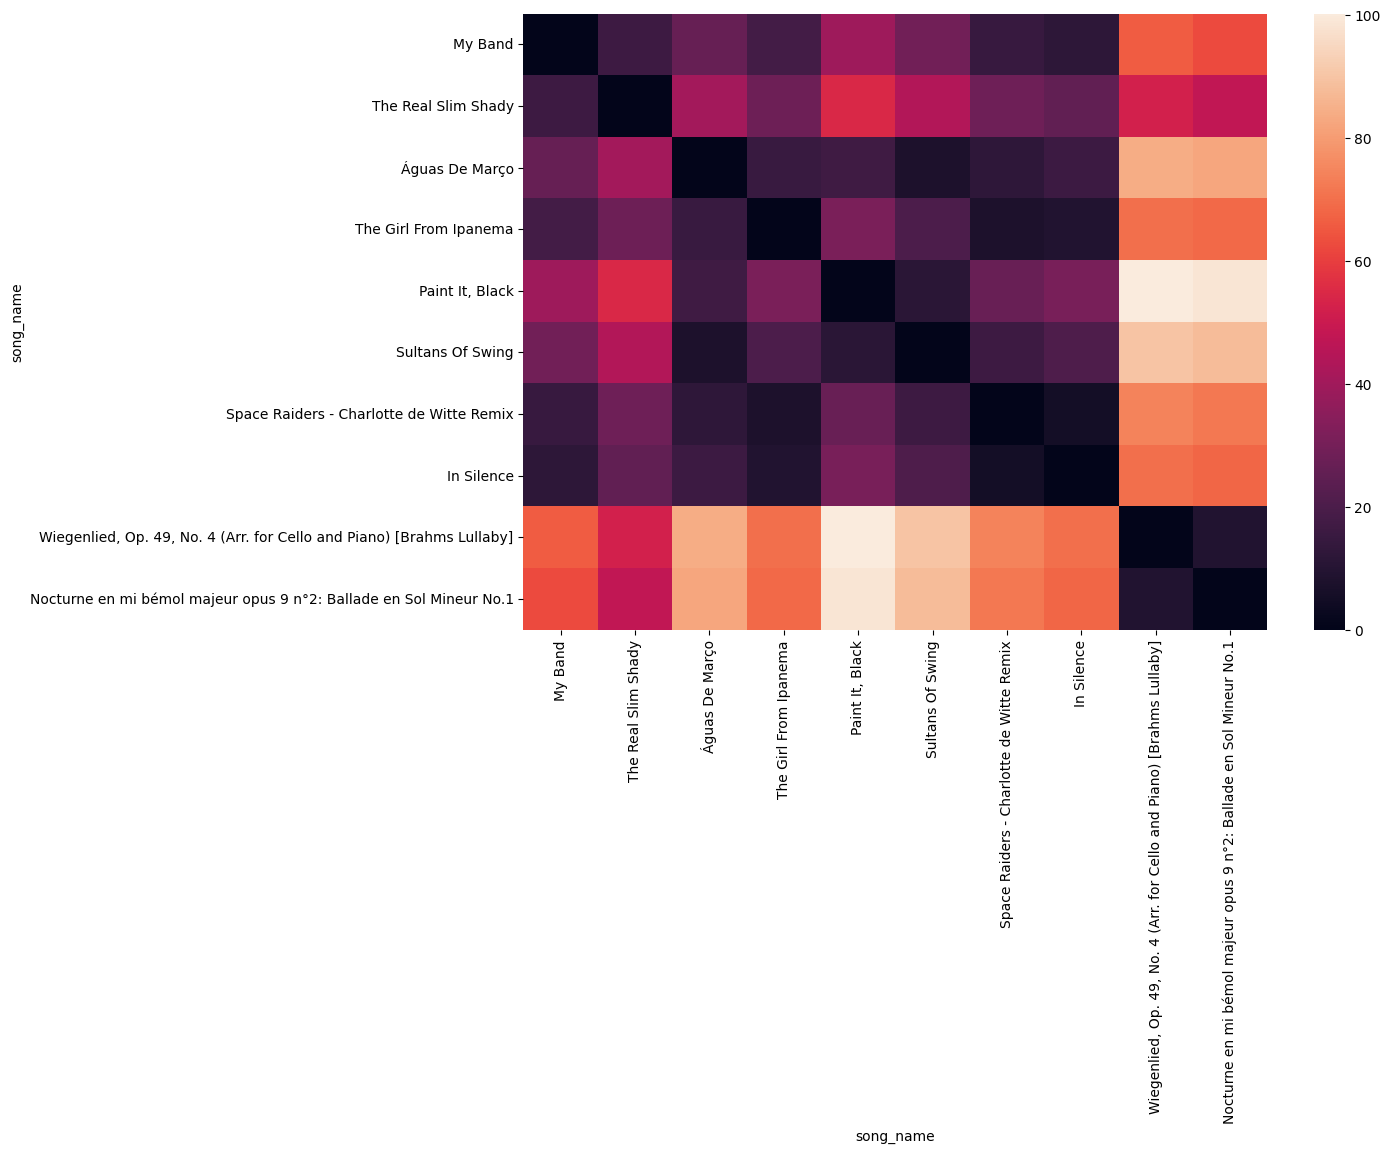

In [8]:
plt.figure(figsize=(12, 8))
sns.heatmap(euclidean_df);


# Calculate manhattan distances

In [9]:
manhattan_distances = pairwise_distances(song_features, metric='manhattan')


In [10]:
manhattan_df = pd.DataFrame(
    manhattan_distances, columns=music['song_name'], index=music['song_name'])


In [11]:
manhattan_df


song_name,My Band,The Real Slim Shady,Águas De Março,The Girl From Ipanema,"Paint It, Black",Sultans Of Swing,Space Raiders - Charlotte de Witte Remix,In Silence,"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby]",Nocturne en mi bémol majeur opus 9 n°2: Ballade en Sol Mineur No.1
song_name,,,,,,,,,,
My Band,0.000000,21.304002,40.021202,32.512458,46.976938,40.798398,25.860258,19.836618,94.864568,86.332298
The Real Slim Shady,21.304002,0.000000,55.037200,43.477260,65.387540,51.348000,38.094660,38.247820,78.807370,70.291100
Águas De Março,40.021202,55.037200,0.000000,20.805660,25.412540,14.385600,19.745060,23.645820,101.765770,93.247500
The Girl From Ipanema,32.512458,43.477260,20.805660,0.000000,46.118080,30.985940,15.435400,15.840160,90.985910,82.441840
"Paint It, Black",46.976938,65.387540,25.412540,46.118080,0.000000,16.039260,33.407320,35.453280,126.722630,118.190360
Sultans Of Swing,40.798398,51.348000,14.385600,30.985940,16.039260,0.000000,20.154060,28.092220,115.901770,107.338500
Space Raiders - Charlotte de Witte Remix,25.860258,38.094660,19.745060,15.435400,33.407320,20.154060,0.000000,8.511840,96.852830,87.500560
In Silence,19.836618,38.247820,23.645820,15.840160,35.453280,28.092220,8.511840,0.000000,92.665390,83.470720
"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby]",94.864568,78.807370,101.765770,90.985910,126.722630,115.901770,96.852830,92.665390,0.000000,9.573270


# Select the relevant columns for scaling

In [13]:
numerical = ['danceability', 'energy', 'key', 'loudness', 'speechiness',
                     'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']


# Extract the numerical columns from the DataFrame

In [15]:
numerical = music[numerical]


# Initialize the MinMaxScaler and apply scaling to the numerical features

In [16]:
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(numerical)


# Convert the scaled features back to a DataFrame

In [19]:
# Select the relevant columns for scaling
numerical_columns = ['danceability', 'energy', 'key', 'loudness', 'speechiness',
                     'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Extract the numerical columns from the DataFrame
numerical_features = music[numerical_columns]

# Initialize the MinMaxScaler and apply scaling to the numerical features
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(numerical_features)

# Convert the scaled features back to a DataFrame
scaled_df = pd.DataFrame(
    scaled_features, columns=numerical_columns, index=numerical_features.index)

# Replace any NaN values with 0
scaled_df = scaled_df.replace(np.nan, 0)

# Calculate pairwise distances using the scaled features
euclidean_distances = pairwise_distances(scaled_df, metric='euclidean')
manhattan_distances = pairwise_distances(scaled_df, metric='manhattan')

# Create DataFrames with the calculated distances
euclidean_df = pd.DataFrame(
    euclidean_distances, columns=music['song_name'], index=music['song_name'])
manhattan_df = pd.DataFrame(
    manhattan_distances, columns=music['song_name'], index=music['song_name'])


In [20]:
euclidean_df


song_name,My Band,The Real Slim Shady,Águas De Março,The Girl From Ipanema,"Paint It, Black",Sultans Of Swing,Space Raiders - Charlotte de Witte Remix,In Silence,"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby]",Nocturne en mi bémol majeur opus 9 n°2: Ballade en Sol Mineur No.1
song_name,,,,,,,,,,
My Band,0.000000,0.864289,1.146338,1.603129e+00,1.175526,1.134481,1.521140,1.433108,2.118357,2.108179
The Real Slim Shady,0.864289,0.000000,1.443564,1.387805e+00,1.492190,1.044587,1.422302,1.426162,2.149514,2.111423
Águas De Março,1.146338,1.443564,0.000000,1.207127e+00,1.435662,1.652530,1.506997,1.788890,1.666658,1.785264
The Girl From Ipanema,1.603129,1.387805,1.207127,2.980232e-08,1.870497,1.535725,1.756547,1.877338,1.476487,1.527842
"Paint It, Black",1.175526,1.492190,1.435662,1.870497e+00,0.000000,0.978242,1.546083,1.532978,2.261338,2.315605
Sultans Of Swing,1.134481,1.044587,1.652530,1.535725e+00,0.978242,0.000000,1.664101,1.540329,2.293498,2.297035
Space Raiders - Charlotte de Witte Remix,1.521140,1.422302,1.506997,1.756547e+00,1.546083,1.664101,0.000000,0.803579,1.942995,1.754687
In Silence,1.433108,1.426162,1.788890,1.877338e+00,1.532978,1.540329,0.803579,0.000000,1.921366,1.690419
"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby]",2.118357,2.149514,1.666658,1.476487e+00,2.261338,2.293498,1.942995,1.921366,0.000000,0.569900


In [21]:
manhattan_df


song_name,My Band,The Real Slim Shady,Águas De Março,The Girl From Ipanema,"Paint It, Black",Sultans Of Swing,Space Raiders - Charlotte de Witte Remix,In Silence,"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby]",Nocturne en mi bémol majeur opus 9 n°2: Ballade en Sol Mineur No.1
song_name,,,,,,,,,,
My Band,0.000000,2.114638,3.130138,3.990726,2.776024,2.964604,3.668847,3.177185,5.953773,5.980933
The Real Slim Shady,2.114638,0.000000,3.913855,3.734583,3.604862,2.397129,3.421293,3.589550,5.944256,6.016665
Águas De Março,3.130138,3.913855,0.000000,2.197385,3.647084,4.161487,3.637005,4.420678,4.351878,4.418631
The Girl From Ipanema,3.990726,3.734583,2.197385,0.000000,4.970881,3.935683,4.488032,4.239715,3.819112,3.649817
"Paint It, Black",2.776024,3.604862,3.647084,4.970881,0.000000,2.234969,3.787876,3.642563,6.660920,6.688080
Sultans Of Swing,2.964604,2.397129,4.161487,3.935683,2.234969,0.000000,3.728129,3.437763,6.820894,6.564431
Space Raiders - Charlotte de Witte Remix,3.668847,3.421293,3.637005,4.488032,3.787876,3.728129,0.000000,1.501875,5.219954,4.337726
In Silence,3.177185,3.589550,4.420678,4.239715,3.642563,3.437763,1.501875,0.000000,4.895035,3.970044
"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby]",5.953773,5.944256,4.351878,3.819112,6.660920,6.820894,5.219954,4.895035,0.000000,1.275267


#using minmax_scaler

In [23]:

# Select the relevant numerical columns for scaling
numerical_columns = ['danceability', 'energy', 'key', 'loudness', 'speechiness',
                     'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Extract the numerical columns from the DataFrame
numerical_features = music[numerical_columns]

# Initialize the MinMaxScaler and apply scaling to the numerical features
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(numerical_features)

# Create a new DataFrame with the scaled features
scaled_df1 = pd.DataFrame(
    scaled_features, columns=numerical_columns, index=numerical_features.index)


In [24]:
scaled_df1


,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.871895,1.000000,0.000000,1.000000,0.476670,0.500436,0.000002,0.199661,0.900138,0.602076
1,1.000000,0.776369,0.571429,0.971414,0.242452,0.027420,0.000000,0.000000,0.803719,0.442503
2,0.598693,0.393341,0.285714,0.597610,1.000000,0.862189,0.000000,0.168552,0.494949,0.842866
3,0.597386,0.156625,1.000000,0.554880,0.075938,0.875362,0.001818,0.168552,0.376722,0.697799
4,0.366013,0.935766,0.000000,0.804648,0.566331,0.046775,0.002673,1.000000,0.633838,1.000000
5,0.717647,0.934576,0.571429,0.779548,0.000000,0.059036,0.040197,0.804864,1.000000,0.891797
6,0.738562,0.859636,0.428571,0.751594,0.707228,0.000000,0.949617,0.185520,0.000000,0.725362
7,0.721569,0.995242,0.000000,0.713347,0.064044,0.002371,0.986857,0.185520,0.158632,0.684332
8,0.000000,0.000000,0.285714,0.000000,0.193962,0.998987,0.652793,0.165724,0.173554,0.000484
9,0.265359,0.043739,0.285714,0.292331,0.052150,1.000000,1.000000,0.188348,0.012856,0.000000


<Axes: >

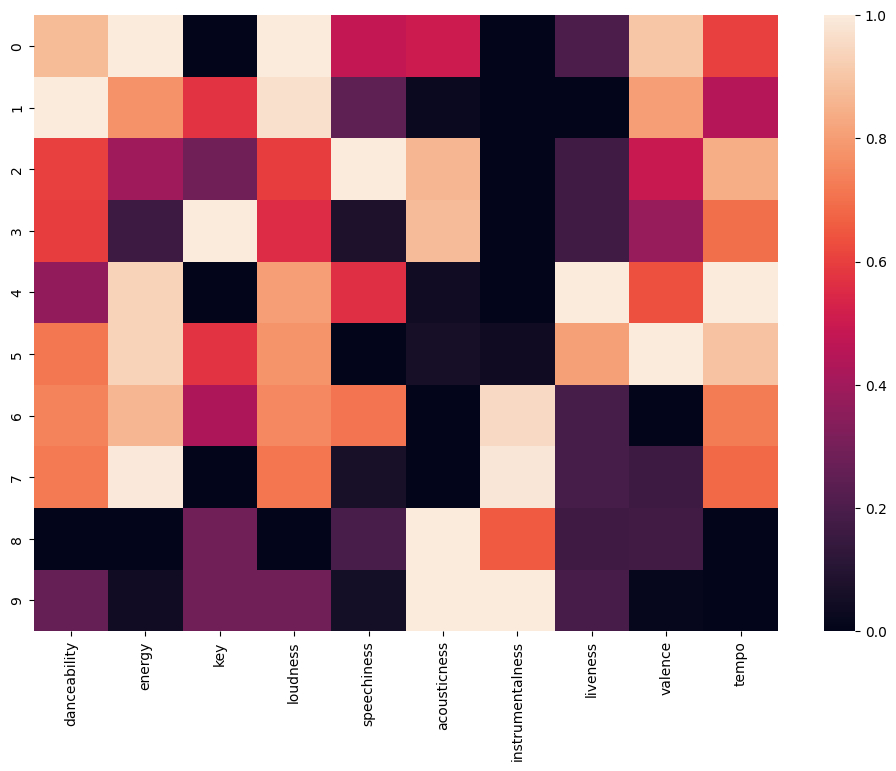

In [25]:
plt.figure(figsize=(12, 8))
sns.heatmap(scaled_df1)


#using Robust scaler.

In [26]:
from sklearn.preprocessing import RobustScaler



# Select the relevant numerical columns for scaling
numerical_columns = ['danceability', 'energy', 'key', 'loudness', 'speechiness',
                     'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Extract the numerical columns from the DataFrame
numerical_features = music[numerical_columns]

# Initialize the RobustScaler and apply scaling to the numerical features
scaler = RobustScaler()
scaled_features = scaler.fit_transform(numerical_features)

# Create a new DataFrame with the scaled features
scaled_df2 = pd.DataFrame(
    scaled_features, columns=numerical_columns, index=numerical_features.index)


In [57]:
scaled_df2

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.688421,0.252893,-0.615385,1.149132,0.541966,0.262798,-0.024496,0.50,0.775276,-0.268775
1,1.101053,-0.057851,0.615385,1.026347,0.050839,-0.300443,-0.024498,-6.56,0.614279,-0.750732
2,-0.191579,-0.590083,0.000000,-0.579272,1.639329,0.693554,-0.024498,-0.60,0.098706,0.458481
3,-0.195789,-0.919008,1.538462,-0.762808,-0.298321,0.709240,-0.022420,-0.60,-0.098706,0.020338
4,-0.941053,0.163636,-0.615385,0.310029,0.729976,-0.277397,-0.021444,28.80,0.330618,0.933074
5,0.191579,0.161983,0.615385,0.202218,-0.457554,-0.262798,0.021444,21.90,0.942022,0.606269
6,0.258947,0.057851,0.307692,0.082142,1.025420,-0.333094,1.060834,0.00,-0.727743,0.103585
7,0.204211,0.246281,-0.615385,-0.082142,-0.323261,-0.330271,1.103396,0.00,-0.462865,-0.020338
8,-2.120000,-1.136645,0.000000,-3.146208,-0.050839,0.856445,0.721590,-0.70,-0.437949,-2.085764
9,-1.265263,-1.075868,0.000000,-1.890549,-0.348201,0.857651,1.118418,0.10,-0.706277,-2.087225


<Axes: >

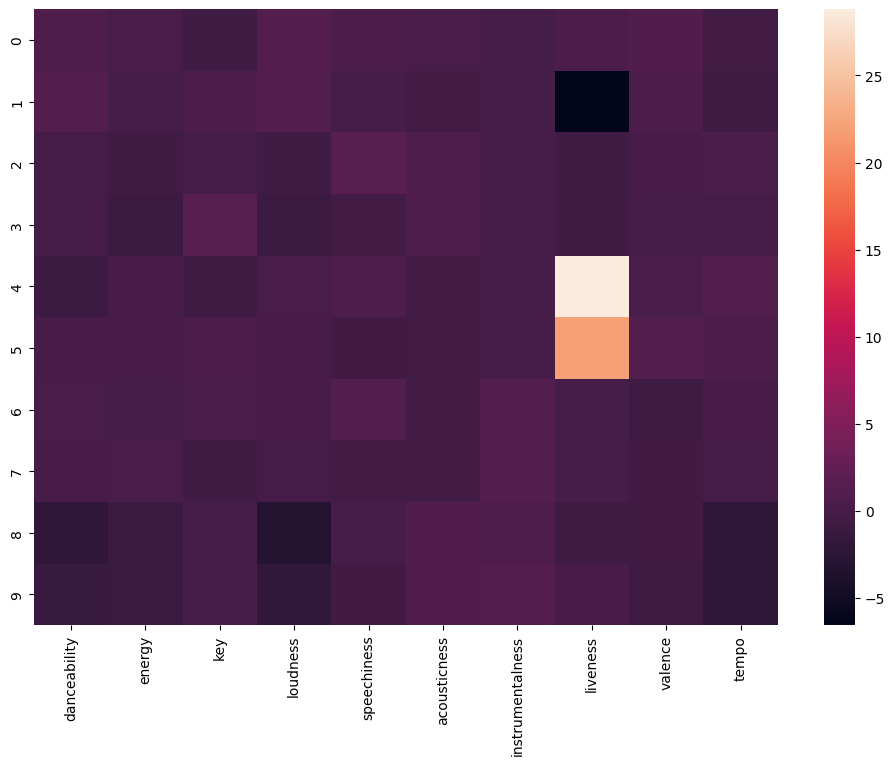

In [27]:
plt.figure(figsize=(12, 8))
sns.heatmap(scaled_df2)


#standard scaler (z scaler)

In [28]:
from sklearn.preprocessing import StandardScaler


# Select the relevant numerical columns for scaling
numerical_columns = ['danceability', 'energy', 'key', 'loudness', 'speechiness',
                     'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Extract the numerical columns from the DataFrame
numerical_features = music[numerical_columns]

# Initialize the StandardScaler and apply scaling to the numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_features)

# Create a new DataFrame with the scaled features
scaled_df3 = pd.DataFrame(
    scaled_features, columns=numerical_columns, index=numerical_features.index)


In [60]:
scaled_df3

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,1.000384,0.992687,-1.138990,1.217434,0.435538,0.146786,-0.816077,-0.349827,1.270021,0.040646
1,1.451340,0.424153,0.759326,1.118976,-0.299450,-0.952202,-0.816082,-1.002517,0.994657,-0.445036
2,0.038653,-0.549612,-0.189832,-0.168522,2.077778,0.987271,-0.816082,-0.451521,0.112834,0.773521
3,0.034052,-1.151411,2.183063,-0.315694,-0.821981,1.017877,-0.811999,-0.451521,-0.224816,0.331992
4,-0.780429,0.829385,-1.138990,0.544582,0.716901,-0.907235,-0.810080,2.266479,0.509490,1.251782
5,0.457397,0.826361,0.759326,0.458132,-1.060278,-0.878748,-0.725811,1.628581,1.555220,0.922451
6,0.531023,0.635842,0.284747,0.361846,1.159042,-1.015909,1.316484,-0.396051,-1.300705,0.415883
7,0.471202,0.980591,-1.138990,0.230112,-0.859305,-1.010400,1.400114,-0.396051,-0.847664,0.291002
8,-2.068872,-1.549596,-0.189832,-2.226872,-0.451616,1.305102,0.649903,-0.460766,-0.805048,-1.790384
9,-1.134751,-1.438400,-0.189832,-1.219995,-0.896629,1.307456,1.429630,-0.386806,-1.263989,-1.791856


<Axes: >

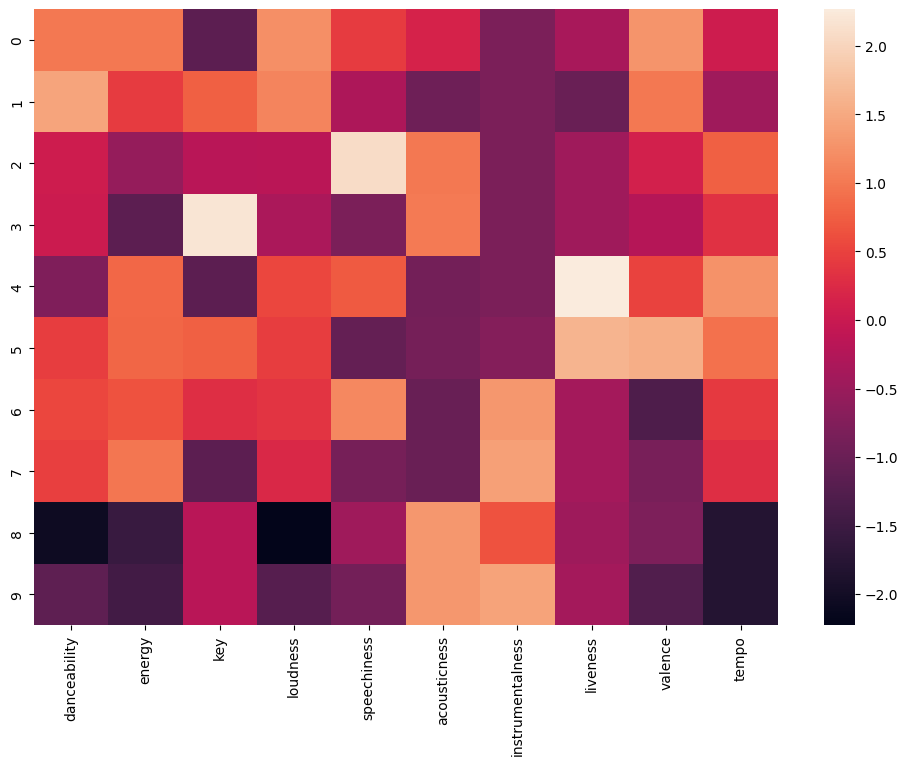

In [29]:
plt.figure(figsize=(12, 8))
sns.heatmap(scaled_df3)


#Absolute scaling

In [30]:

from sklearn.preprocessing import MaxAbsScaler


# Select the relevant numerical columns for scaling
numerical_columns = ['danceability', 'energy', 'key', 'loudness', 'speechiness',
                     'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Extract the numerical columns from the DataFrame
numerical_features = music[numerical_columns]

# Initialize the MaxAbsScaler and apply scaling to the numerical features
scaler = MaxAbsScaler()
scaled_features = scaler.fit_transform(numerical_features)

# Create a new DataFrame with the scaled features
scaled_df4 = pd.DataFrame(
    scaled_features, columns=numerical_columns, index=numerical_features.index)


In [31]:
scaled_df4

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.896733,1.000000,0.125,-0.100976,0.591429,0.502020,0.000002,0.290727,0.906552,0.756275
1,1.000000,0.778563,0.625,-0.126675,0.408571,0.030505,0.000000,0.113784,0.816327,0.658538
2,0.676502,0.399293,0.375,-0.462735,1.000000,0.862626,0.000000,0.263158,0.527390,0.903756
3,0.675448,0.164900,1.000,-0.501149,0.278571,0.875758,0.001818,0.263158,0.416756,0.814904
4,0.488936,0.936396,0.125,-0.276602,0.661429,0.049798,0.002673,1.000000,0.657358,1.000000
5,0.772392,0.935218,0.625,-0.299167,0.219286,0.062020,0.040197,0.827068,1.000000,0.933727
6,0.789252,0.861013,0.500,-0.324299,0.771429,0.003172,0.949617,0.278195,0.064232,0.831786
7,0.775553,0.995289,0.125,-0.358684,0.269286,0.005535,0.986857,0.278195,0.212675,0.806656
8,0.193888,0.009812,0.375,-1.000000,0.370714,0.998990,0.652793,0.260652,0.226638,0.387804
9,0.407798,0.053121,0.375,-0.737188,0.260000,1.000000,1.000000,0.280702,0.076262,0.387508


<Axes: >

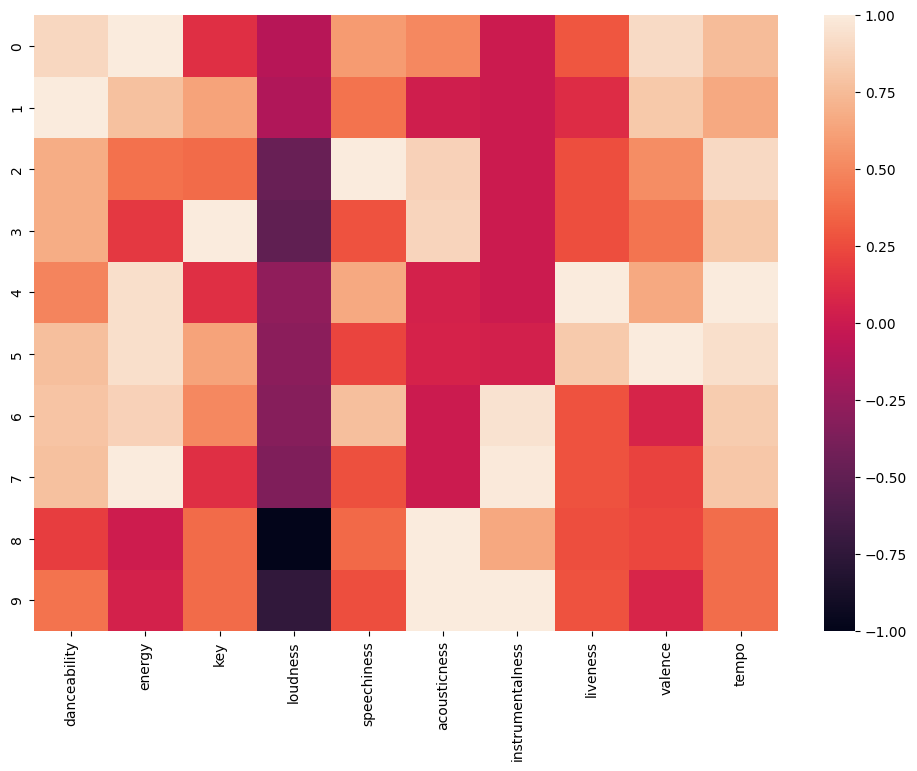

In [32]:
plt.figure(figsize=(12, 8))
sns.heatmap(scaled_df4)


#Unit Vector Scaling

In [34]:
from sklearn.preprocessing import Normalizer


# Select the relevant numerical columns for scaling
numerical_columns = ['danceability', 'energy', 'key', 'loudness', 'speechiness',
                     'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Extract the numerical columns from the DataFrame
numerical_features = music[numerical_columns]

# Initialize the Normalizer and apply scaling to the numerical features
scaler = Normalizer()
scaled_features = scaler.fit_transform(numerical_features)

# Create a new DataFrame with the scaled features
scaled_df5 = pd.DataFrame(
    scaled_features, columns=numerical_columns, index=numerical_features.index)


In [35]:
scaled_df5

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.007087,0.007071,0.008328,-0.028174,0.000690,0.004139,1.707253e-08,0.000966,0.007029,0.999484
1,0.009062,0.006312,0.047747,-0.040528,0.000546,0.000288,0.000000e+00,0.000434,0.007258,0.997949
2,0.004449,0.002349,0.020791,-0.107443,0.000970,0.005919,0.000000e+00,0.000728,0.003403,0.993957
3,0.004906,0.001072,0.061231,-0.128508,0.000298,0.006636,1.270534e-05,0.000804,0.002970,0.989777
4,0.002919,0.005001,0.006291,-0.058294,0.000583,0.000310,1.534892e-05,0.002510,0.003850,0.998252
5,0.004933,0.005343,0.033646,-0.067448,0.000207,0.000413,2.469651e-04,0.002221,0.006265,0.997107
6,0.005652,0.005517,0.030186,-0.081993,0.000815,0.000024,6.542859e-03,0.000838,0.000451,0.996122
7,0.005724,0.006572,0.007777,-0.093456,0.000293,0.000043,7.007095e-03,0.000863,0.001540,0.995529
8,0.002623,0.000119,0.042769,-0.477632,0.000740,0.014100,8.496815e-03,0.001483,0.003008,0.877353
9,0.005833,0.000680,0.045214,-0.372231,0.000549,0.014921,1.376010e-02,0.001688,0.001070,0.926795


<Axes: >

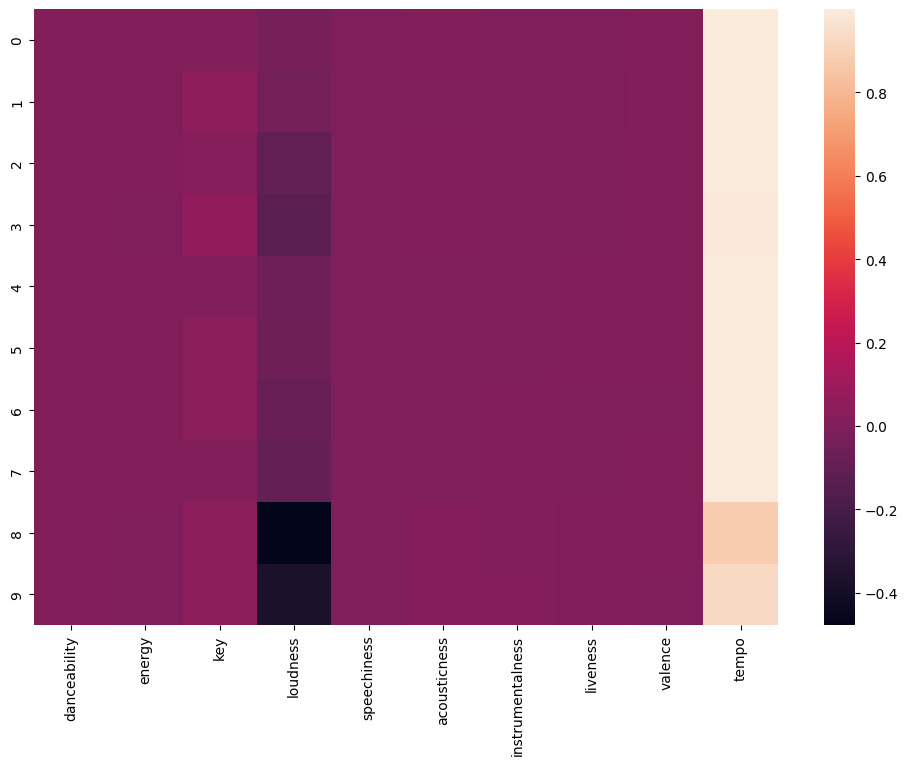

In [36]:
plt.figure(figsize=(12, 8))
sns.heatmap(scaled_df5)


In [37]:
from sklearn.cluster import KMeans


In [38]:
my_kmeans = KMeans(n_clusters=5)


In [39]:
my_kmeans.fit(scaled_df)


/Users/leoking/anaconda3/envs/recommenders/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

In [40]:
clusters = my_kmeans.predict(scaled_df)
clusters


array([4, 4, 3, 3, 2, 2, 1, 1, 0, 0], dtype=int32)

In [41]:
cp_music = pd.DataFrame(clusters, columns=['Cluster Label'])
cp_music.sample(5)


,Cluster Label
8,0
2,3
6,1
5,2
0,4


In [42]:
columns_selected = ['danceability', 'energy', 'key', 'loudness', 'speechiness',
                    'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']


In [43]:
cp_music[columns_selected] = scaled_df
cp_music


,Cluster Label,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,4,0.871895,1.000000,0.000000,1.000000,0.476670,0.500436,0.000002,0.199661,0.900138,0.602076
1,4,1.000000,0.776369,0.571429,0.971414,0.242452,0.027420,0.000000,0.000000,0.803719,0.442503
2,3,0.598693,0.393341,0.285714,0.597610,1.000000,0.862189,0.000000,0.168552,0.494949,0.842866
3,3,0.597386,0.156625,1.000000,0.554880,0.075938,0.875362,0.001818,0.168552,0.376722,0.697799
4,2,0.366013,0.935766,0.000000,0.804648,0.566331,0.046775,0.002673,1.000000,0.633838,1.000000
5,2,0.717647,0.934576,0.571429,0.779548,0.000000,0.059036,0.040197,0.804864,1.000000,0.891797
6,1,0.738562,0.859636,0.428571,0.751594,0.707228,0.000000,0.949617,0.185520,0.000000,0.725362
7,1,0.721569,0.995242,0.000000,0.713347,0.064044,0.002371,0.986857,0.185520,0.158632,0.684332
8,0,0.000000,0.000000,0.285714,0.000000,0.193962,0.998987,0.652793,0.165724,0.173554,0.000484
9,0,0.265359,0.043739,0.285714,0.292331,0.052150,1.000000,1.000000,0.188348,0.012856,0.000000


/Users/leoking/anaconda3/envs/recommenders/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/leoking/anaconda3/envs/recommenders/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/leoking/anaconda3/envs/recommenders/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/leoking/anaconda3/envs/recommenders/lib/python3.11/site-packages/sklearn/cluster/

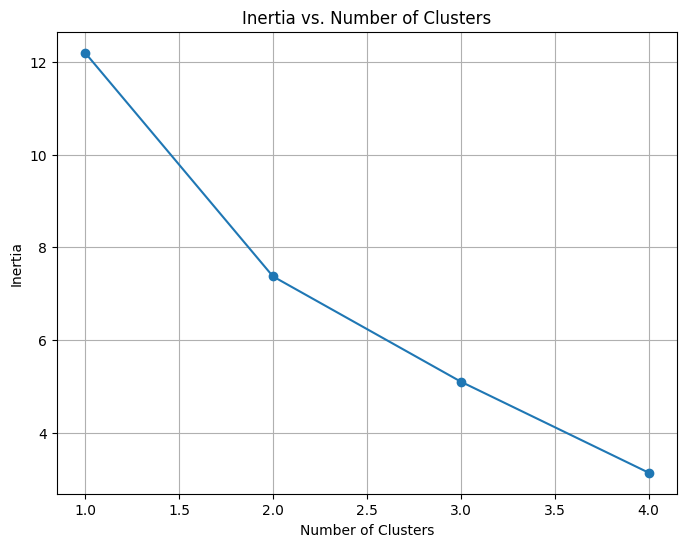

In [44]:

# Calculate inertia for different values of n_clusters
inertia_values = []
for num_clusters in range(1, 5):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(scaled_df)
    inertia_values.append(kmeans.inertia_)

# Plot the inertia values
plt.figure(figsize=(8, 6))
plt.plot(range(1, 5), inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Inertia vs. Number of Clusters')
plt.grid(True)
plt.show()


In [45]:
from sklearn.metrics import silhouette_score


In [46]:
# Fit KMeans with n_clusters=5
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(scaled_df1)

# Calculate the Silhouette Score
silhouette_avg = silhouette_score(scaled_df, kmeans.labels_)
print("The Silhouette Score is:", silhouette_avg)


The Silhouette Score is: 0.33849168013085984


/Users/leoking/anaconda3/envs/recommenders/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/Users/leoking/anaconda3/envs/recommenders/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/leoking/anaconda3/envs/recommenders/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/leoking/anaconda3/envs/recommenders/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/leoking/anaconda3/envs/recommenders/lib/python3.11/site-packages/sklearn/cluster/

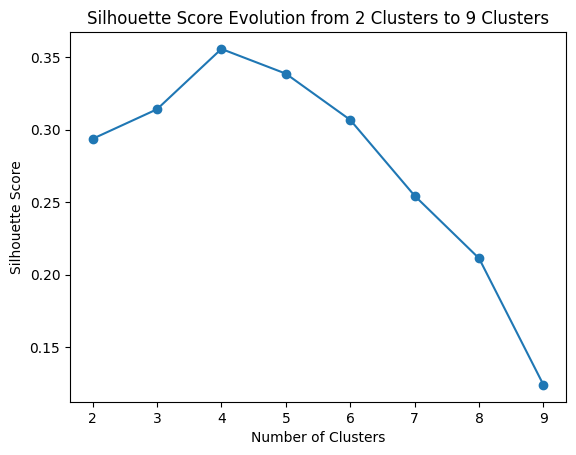

In [47]:
max_k = 10
sil_score = []

for k in range(2, max_k):
    labels = KMeans(n_clusters=k).fit(scaled_df1).labels_
    sil_score.append(silhouette_score(scaled_df1, labels))

# Plot the Silhouette Score evolution
plt.title(f'Silhouette Score Evolution from 2 Clusters to {max_k-1} Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.plot(range(2, max_k), sil_score, marker='o')
plt.show()


In [49]:
from sklearn.metrics import silhouette_score, silhouette_samples



/Users/leoking/anaconda3/envs/recommenders/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


* For k = 2 the average silhouette score is: 0.2936
	- For cluster 0, the silhouette value is: 0.35
	- For cluster 1, the silhouette value is: 0.27


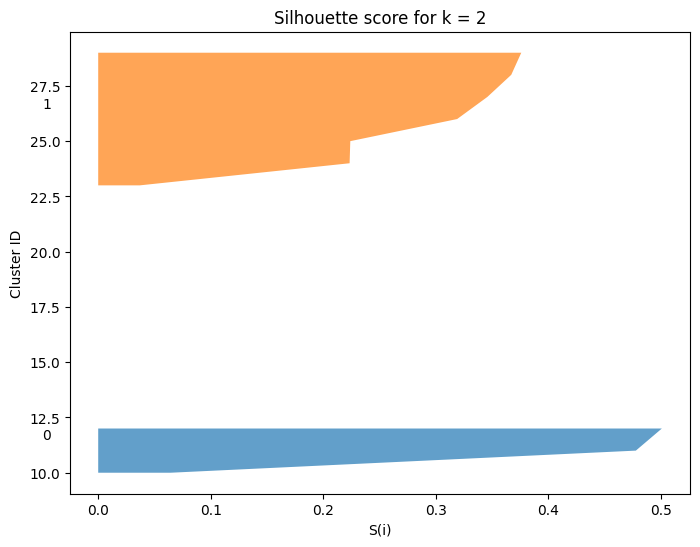

/Users/leoking/anaconda3/envs/recommenders/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


* For k = 3 the average silhouette score is: 0.2758
	- For cluster 0, the silhouette value is: 0.48
	- For cluster 1, the silhouette value is: 0.29
	- For cluster 2, the silhouette value is: 0.19


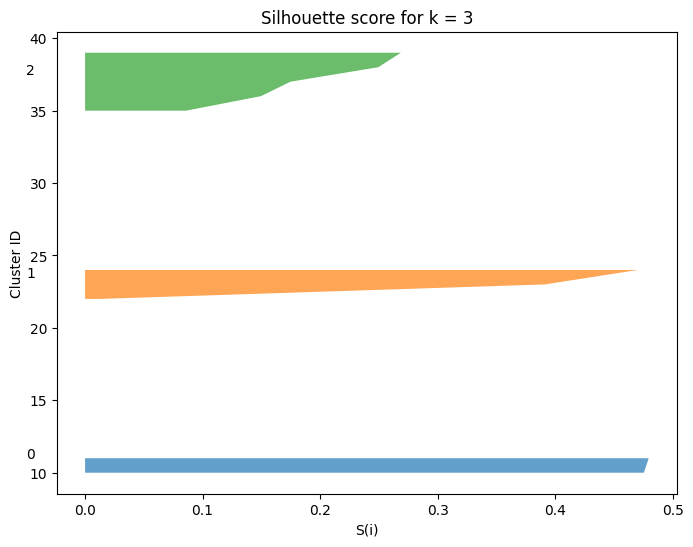

/Users/leoking/anaconda3/envs/recommenders/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


* For k = 4 the average silhouette score is: 0.3555
	- For cluster 0, the silhouette value is: 0.17
	- For cluster 1, the silhouette value is: 0.24
	- For cluster 2, the silhouette value is: 0.65
	- For cluster 3, the silhouette value is: 0.47


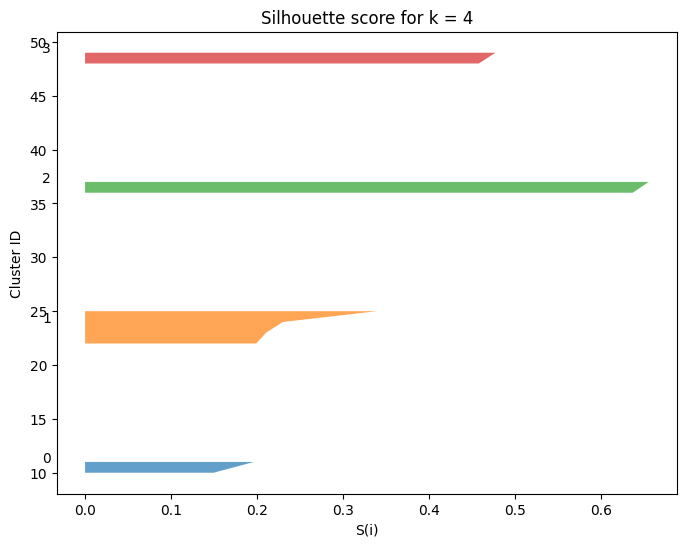

In [50]:
max_k = 5
data = scaled_df1

for k in range(2, max_k):
    kmean_model = KMeans(n_clusters=k).fit(data)
    labels = kmean_model.labels_

    if 1 < k < data.shape[0]:

        fig, axis1 = plt.subplots(1, 1)
        fig.set_size_inches(8, 6)

        sil_avg = silhouette_score(data, labels)
        print(
            f"* For k = {k} the average silhouette score is: {round(sil_avg, 4)}")
        sample_sil_val = silhouette_samples(data, labels)

        y_lower = 10

        for i in range(k):
            ith_cluster_sv = sample_sil_val[labels == i]
            print(
                f"\t- For cluster {i}, the silhouette value is: {round(np.mean(ith_cluster_sv), 2)}")

            ith_cluster_sv.sort()

            # Calculate where to put the silhouette on the y axes
            ith_cluster_size = ith_cluster_sv.shape[0]
            y_upper = y_lower + ith_cluster_size

            # Paint the cluster
            axis1.fill_betweenx(np.arange(y_lower, y_upper),
                                0, ith_cluster_sv,
                                alpha=0.7)

            # Label the cluster
            axis1.text(-0.05, y_lower + 0.5 * ith_cluster_size, str(i))

            # Calculate the next y lower value for the next cluster of the graph
            y_lower = y_upper + 10  # we leave 10 spaces without any observation

        axis1.set_title("Silhouette score for k = %s" % str(k))
        axis1.set_xlabel("S(i)")
        axis1.set_ylabel("Cluster ID")

        plt.show()
